# Exploring Perisomatic Features

In this tutorial we will explore how perisomatic shape and synapse features vary by different cell class and subclasses. The analyses in this notebook are aimed to recreate the panels of Figure 3 in the accompanying manuscript.

On a technical note: these features were extracted from the dataset version 661 and thus all the segment IDs refer to that version. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import matplotlib
%matplotlib inline
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Calibri') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 22})

### Reading the Data

In [2]:
soma_df = pd.read_pickle('../data/microns_SomaData_AllCells_v661.pkl')

soma_df.head()

soma_id  nucleus_id  soma_depth_x  soma_depth_y  soma_depth_z  \
0  864691135367507449      102922    372.077974     11.642521    988.148453   
1  864691135544392744      103422    413.069281     13.142513   1015.008581   
2  864691136116137892      103772    363.338459     59.072539    604.297061   
3  864691135759342670      103918    352.193980     74.290392    645.586752   
4  864691135396715297      103934    355.425211     54.882703    644.812655   

   is_column  nucleus_volume_um  nucleus_area_um  \
0      False         242.434443       291.719507   
1      False         119.724101       171.281445   
2      False         141.377333       186.212794   
3      False         266.646830       335.337329   
4      False         113.178869       170.975406   

   nuclear_area_to_volume_ratio  nuclear_folding_area_um  ...  soma_area_um  \
0                      1.203292             7.356007e+07  ...   3232.426397   
1                      1.430635             1.320443e+07  ...  12612.629508   
2                      1.317133             1.350620e+07  ...  20462.866309   
3                      1.257609             9.283144e+07  ...    801.402688   
4                      1.510665             6.014822e+06  ...  13989.415665   

   soma_to_nucleus_center_dist  soma_area_to_volume_ratio  \
0                  2908.304887                   2.911384   
1                  2986.470310                   8.604149   
2                  3430.662345                  11.306793   
3                  1477.440275                   1.196429   
4                  2537.168117                  10.323503   

   soma_synapse_number  soma_synapse_density_um  cortical_column_labels  \
0           350.468040                 0.110509                    None   
1           188.502392                 0.015660                    None   
2            20.094164                 0.001020                    None   
3           183.435124                 0.230243                    None   
4            19.062040                 0.001300                    None   

     predicted_class  predicted_subclass umap_embedding_x umap_embedding_y  
0  excitatory_neuron                 23P         5.082744         3.566612  
1          nonneuron           astrocyte        14.143975         0.019433  
2          nonneuron           astrocyte        14.031742        -0.249511  
3  inhibitory_neuron                 NGC         5.486012         3.927278  
4          nonneuron           astrocyte        14.135542        -0.198758  

[5 rows x 23 columns]

In [12]:
minnie = pd.read_pickle('/Users/leilae/aibs/Neural_coding/data/minnie_features_w_embedding_092023.pkl')

In [13]:
minnie.shape, soma_df.shape

((94010, 66), (94014, 23))

In [24]:
soma_df.columns

Index(['soma_id', 'nucleus_id', 'soma_depth_x', 'soma_depth_y', 'soma_depth_z',
       'is_column', 'nucleus_volume_um', 'nucleus_area_um',
       'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
       'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 'soma_volume_um',
       'soma_area_um', 'soma_to_nucleus_center_dist',
       'soma_area_to_volume_ratio', 'soma_synapse_number',
       'soma_synapse_density_um', 'umap_embedding_x', 'umap_embedding_y',
       'cortical_column_labels', 'predicted_class', 'predicted_subclass',
       'soma_minnie_embedding_0', 'soma_minnie_embedding_1'],
      dtype='object')

In [18]:
soma_df = soma_df.merge(minnie[['nucleus_id','soma_minnie_embedding_0','soma_minnie_embedding_1']],
how='left',on='nucleus_id')

In [25]:
soma_df = soma_df.drop(['umap_embedding_x', 'umap_embedding_y'], axis=1)

In [27]:
soma_df =  soma_df.rename(columns={"soma_minnie_embedding_0": "umap_embedding_x", "soma_minnie_embedding_1": "umap_embedding_y"})

In [29]:
soma_df.to_pickle('../data/microns_SomaData_AllCells_v661.pkl')

### Single Feature Plots 

In [4]:
soma_df.columns

Index(['soma_id', 'nucleus_id', 'soma_depth_x', 'soma_depth_y', 'soma_depth_z',
       'is_column', 'nucleus_volume_um', 'nucleus_area_um',
       'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
       'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 'soma_volume_um',
       'soma_area_um', 'soma_to_nucleus_center_dist',
       'soma_area_to_volume_ratio', 'soma_synapse_number',
       'soma_synapse_density_um', 'umap_embedding_x', 'umap_embedding_y',
       'cortical_column_labels', 'predicted_class', 'predicted_subclass'],
      dtype='object')

In [5]:
#Establishing our color scheme
coarse_color_dict = {
              'excitatory_neuron': 'lightskyblue',
              'inhibitory_neuron': 'm',
              'astrocyte': 'mediumseagreen',
              'oligo': 'yellowgreen',
              'microglia': 'darkolivegreen',
              'pericyte': 'saddlebrown',
              'OPC': 'tan'
}

labels = [i.predicted_class if '_neuron' in i.predicted_class else i.predicted_subclass for ix, 
          i in soma_df[~soma_df.cortical_column_labels.isna()].iterrows()]

How does the fraction of nuclear volume change as a function of layer and cell class?

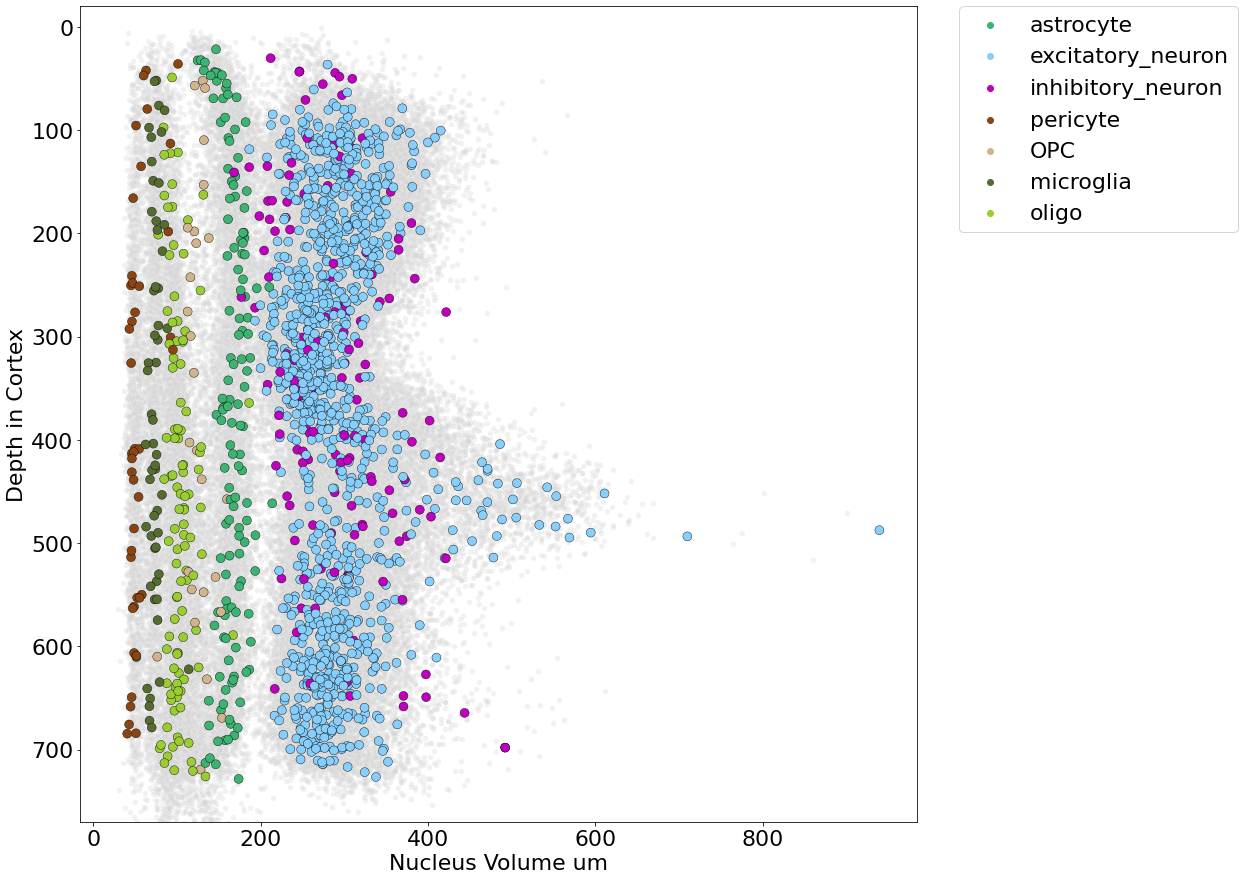

In [19]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='nucleus_volume_um', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='nucleus_volume_um', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xlabel('Nucleus Volume um')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

How about the fraction of nucleus area within a nuclear fold?

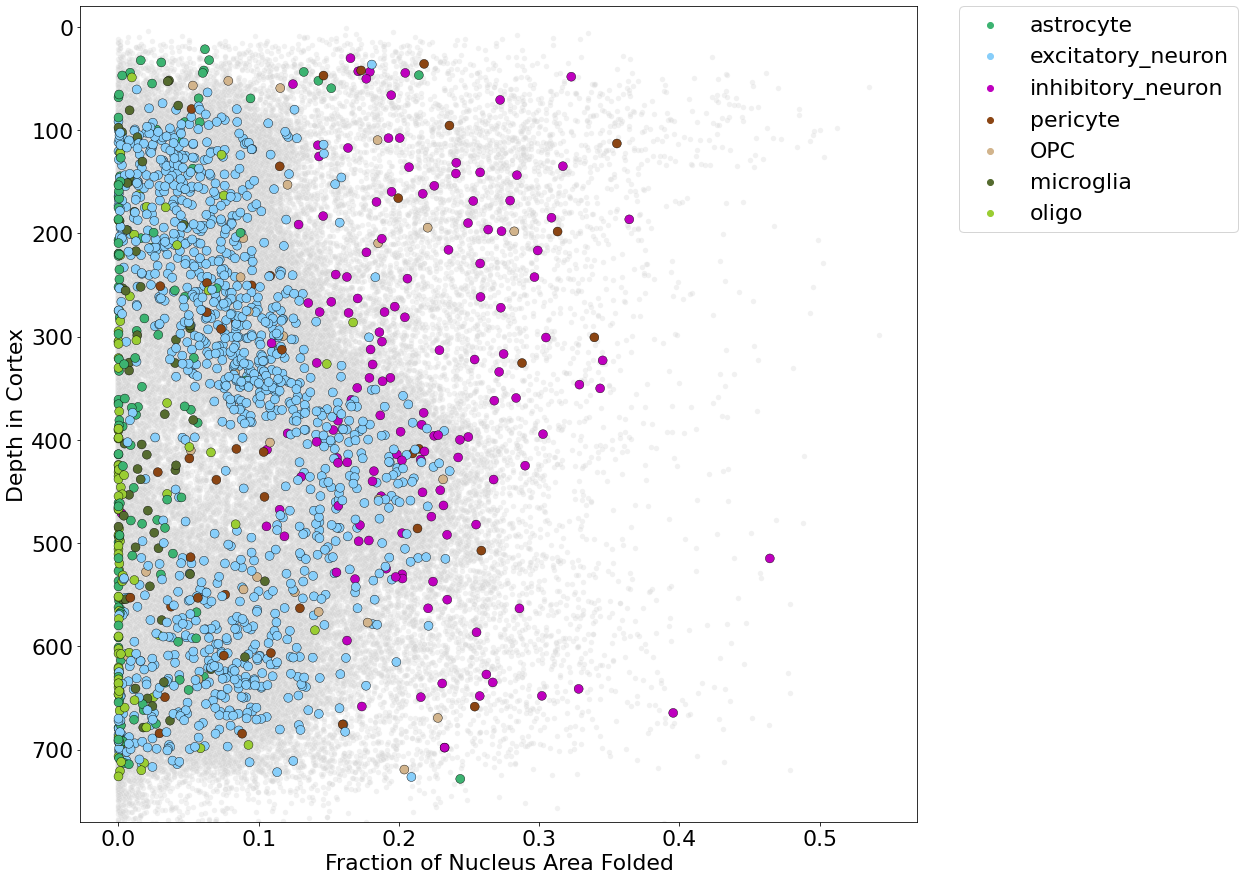

In [20]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='fraction_nuclear_folding', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='fraction_nuclear_folding', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xlabel('Fraction of Nucleus Area Folded')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

And the somatic synapse density?

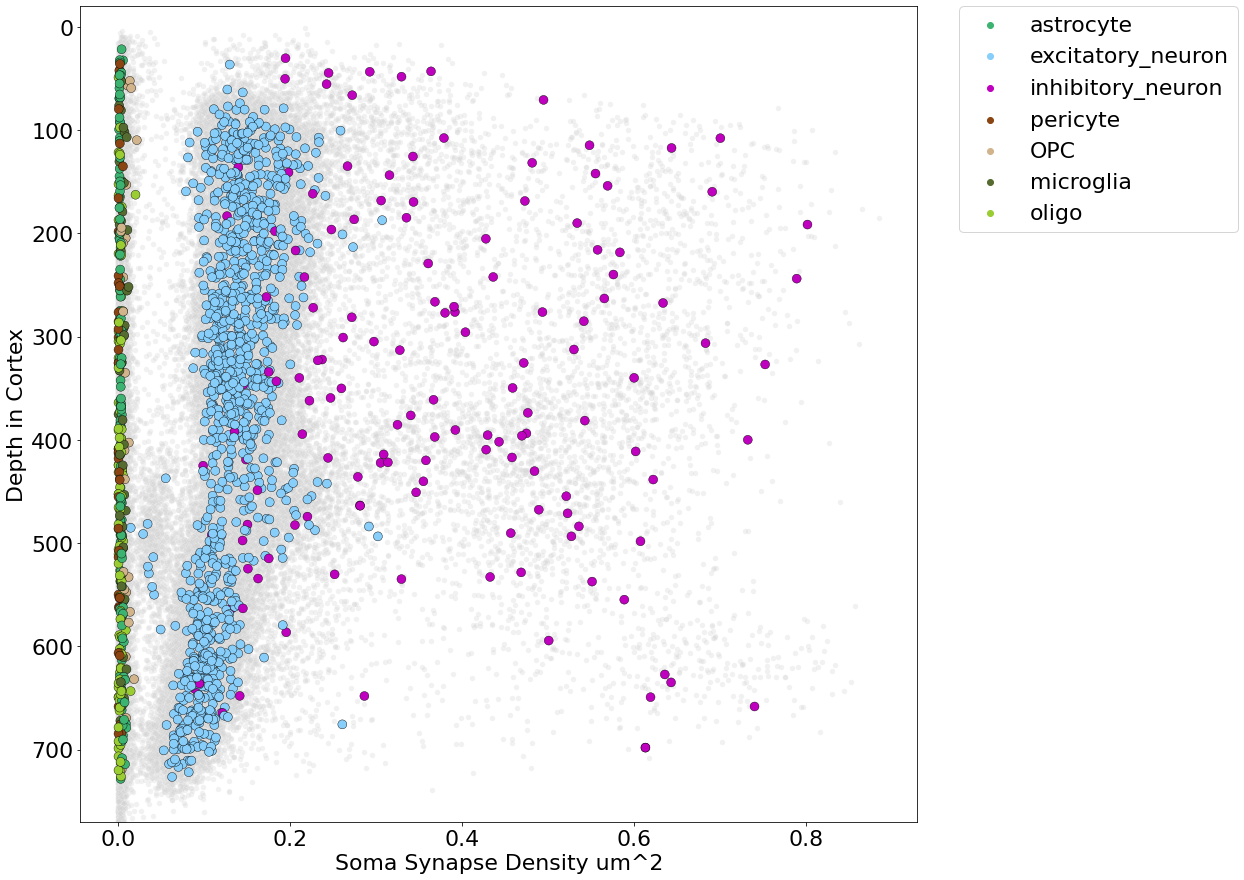

In [21]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_synapse_density_um', y='soma_depth_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='soma_synapse_density_um', y='soma_depth_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)


ax.set_xlabel('Soma Synapse Density um^2')
ax.set_ylabel('Depth in Cortex')
ax.set(ylim=(-20,770))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

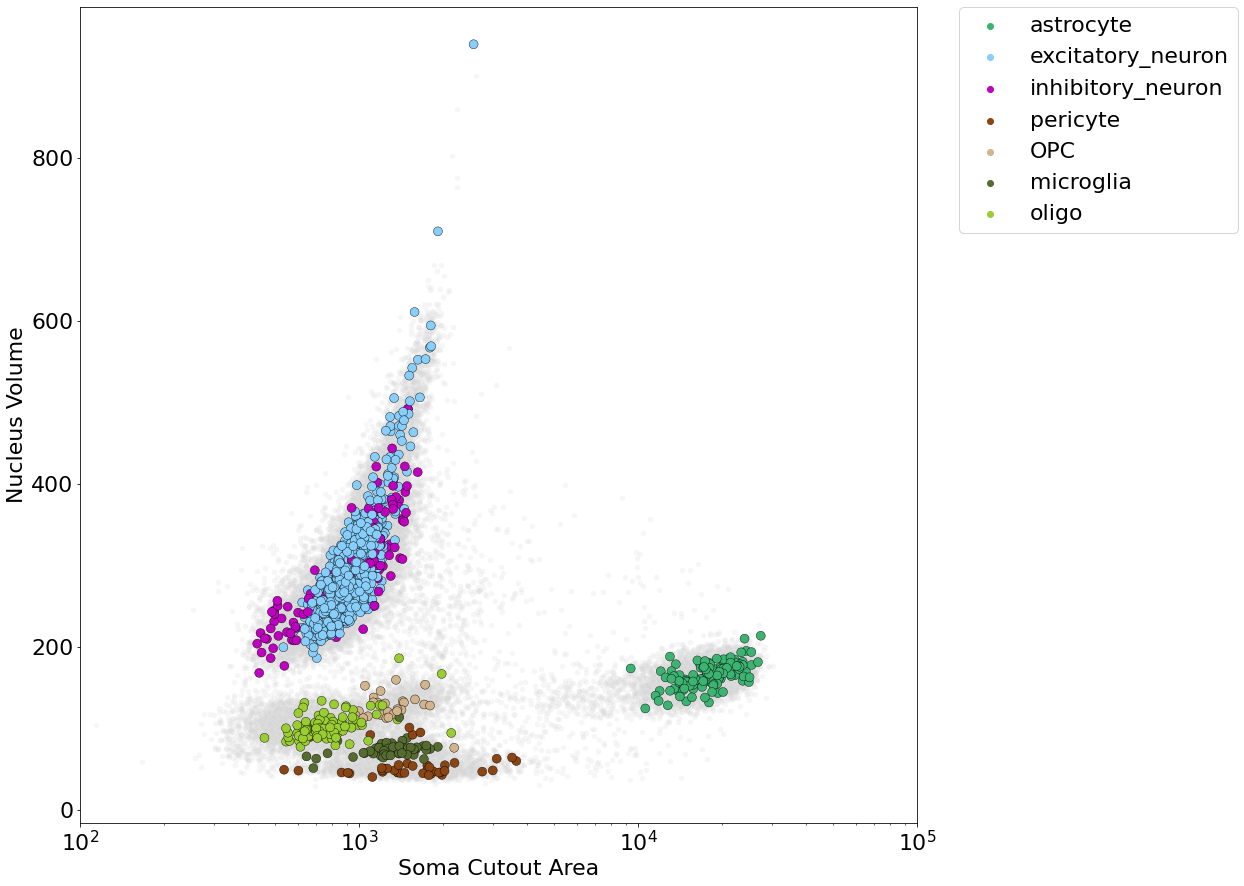

In [22]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='soma_area_um', y='nucleus_volume_um', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray', alpha = 0.2)
sns.scatterplot(x='soma_area_um', y='nucleus_volume_um', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=80, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)

ax.set_xscale('log')
ax.set_xlabel('Soma Cutout Area')
ax.set_ylabel('Nucleus Volume')
ax.set(xlim=(100,100000))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### All the features at once

Let's start by looking at the low dimensional embedding of all the features using UMAP.

We have supplied the code we used to get the 2D embedding below, however because UMAP embeddings may vary from one run to the next we have it commented out and will plot the save embeddings to best match the one used in the manuscript. 

In [46]:
metrics = ['soma_depth_y', 'nucleus_volume_um', 'nucleus_area_um',
'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 
'soma_volume_um','soma_area_um',
'soma_to_nucleus_center_dist','soma_area_to_volume_ratio', 
'soma_synapse_number','soma_synapse_density_um']

In [47]:
# UMAP Embedding Code below
# soma_features = soma_df[metrics].values
# means_soma=np.mean(soma_features, axis=0)
# stds_soma=np.std(soma_features, axis=0)
# M_soma = (soma_features - means_soma)/stds_soma

# soma_umap = umap.UMAP(min_dist=0, n_epochs=300).fit(M_soma)


# soma_transform_ALL = soma_umap.transform(M_soma)

# df['soma_embedding_0'] =soma_transform_ALL[:,0]
# df['soma_embedding_1'] =soma_transform_ALL[:,1]


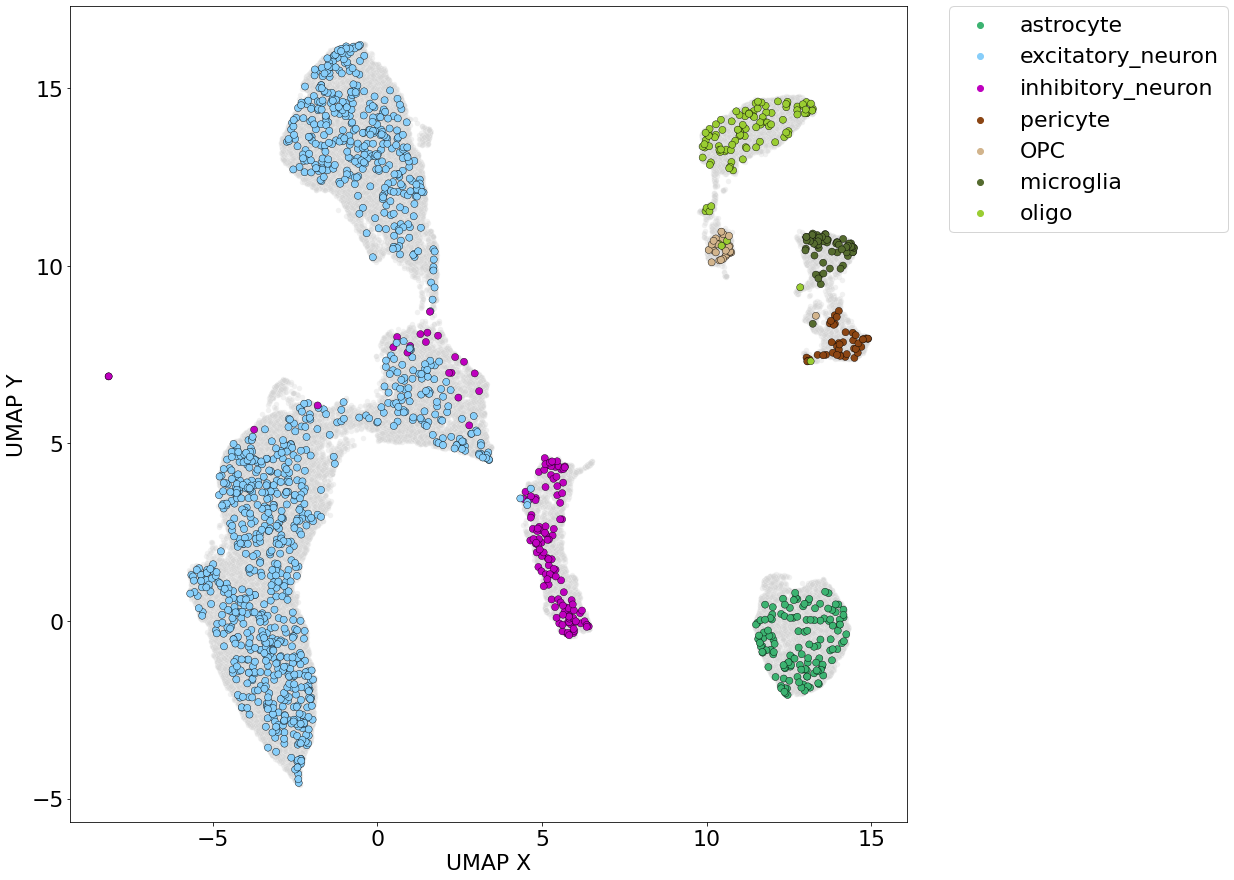

In [28]:
f,ax=plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=50, ax=ax, edgecolor="black",linewidth=.4,
                    hue = labels, palette = coarse_color_dict, alpha = 1.0, legend=True)


ax.set_xlabel('UMAP X')
ax.set_ylabel('UMAP Y')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now let's look at the entire feature matrix for all the labeled cells in the column. Note that in order to see the structure in the matrix we have sorted the cells by their manual labelled cell subclass. 

In [50]:
soma_df.columns

Index(['soma_id', 'nucleus_id', 'soma_depth_x', 'soma_depth_y', 'soma_depth_z',
       'is_column', 'nucleus_volume_um', 'nucleus_area_um',
       'nuclear_area_to_volume_ratio', 'nuclear_folding_area_um',
       'fraction_nuclear_folding', 'nucleus_to_soma_ratio', 'soma_volume_um',
       'soma_area_um', 'soma_to_nucleus_center_dist',
       'soma_area_to_volume_ratio', 'soma_synapse_number',
       'soma_synapse_density_um', 'umap_embedding_x', 'umap_embedding_y',
       'cortical_column_labels', 'predicted_class', 'predicted_subclass'],
      dtype='object')

### Excitatory Cells

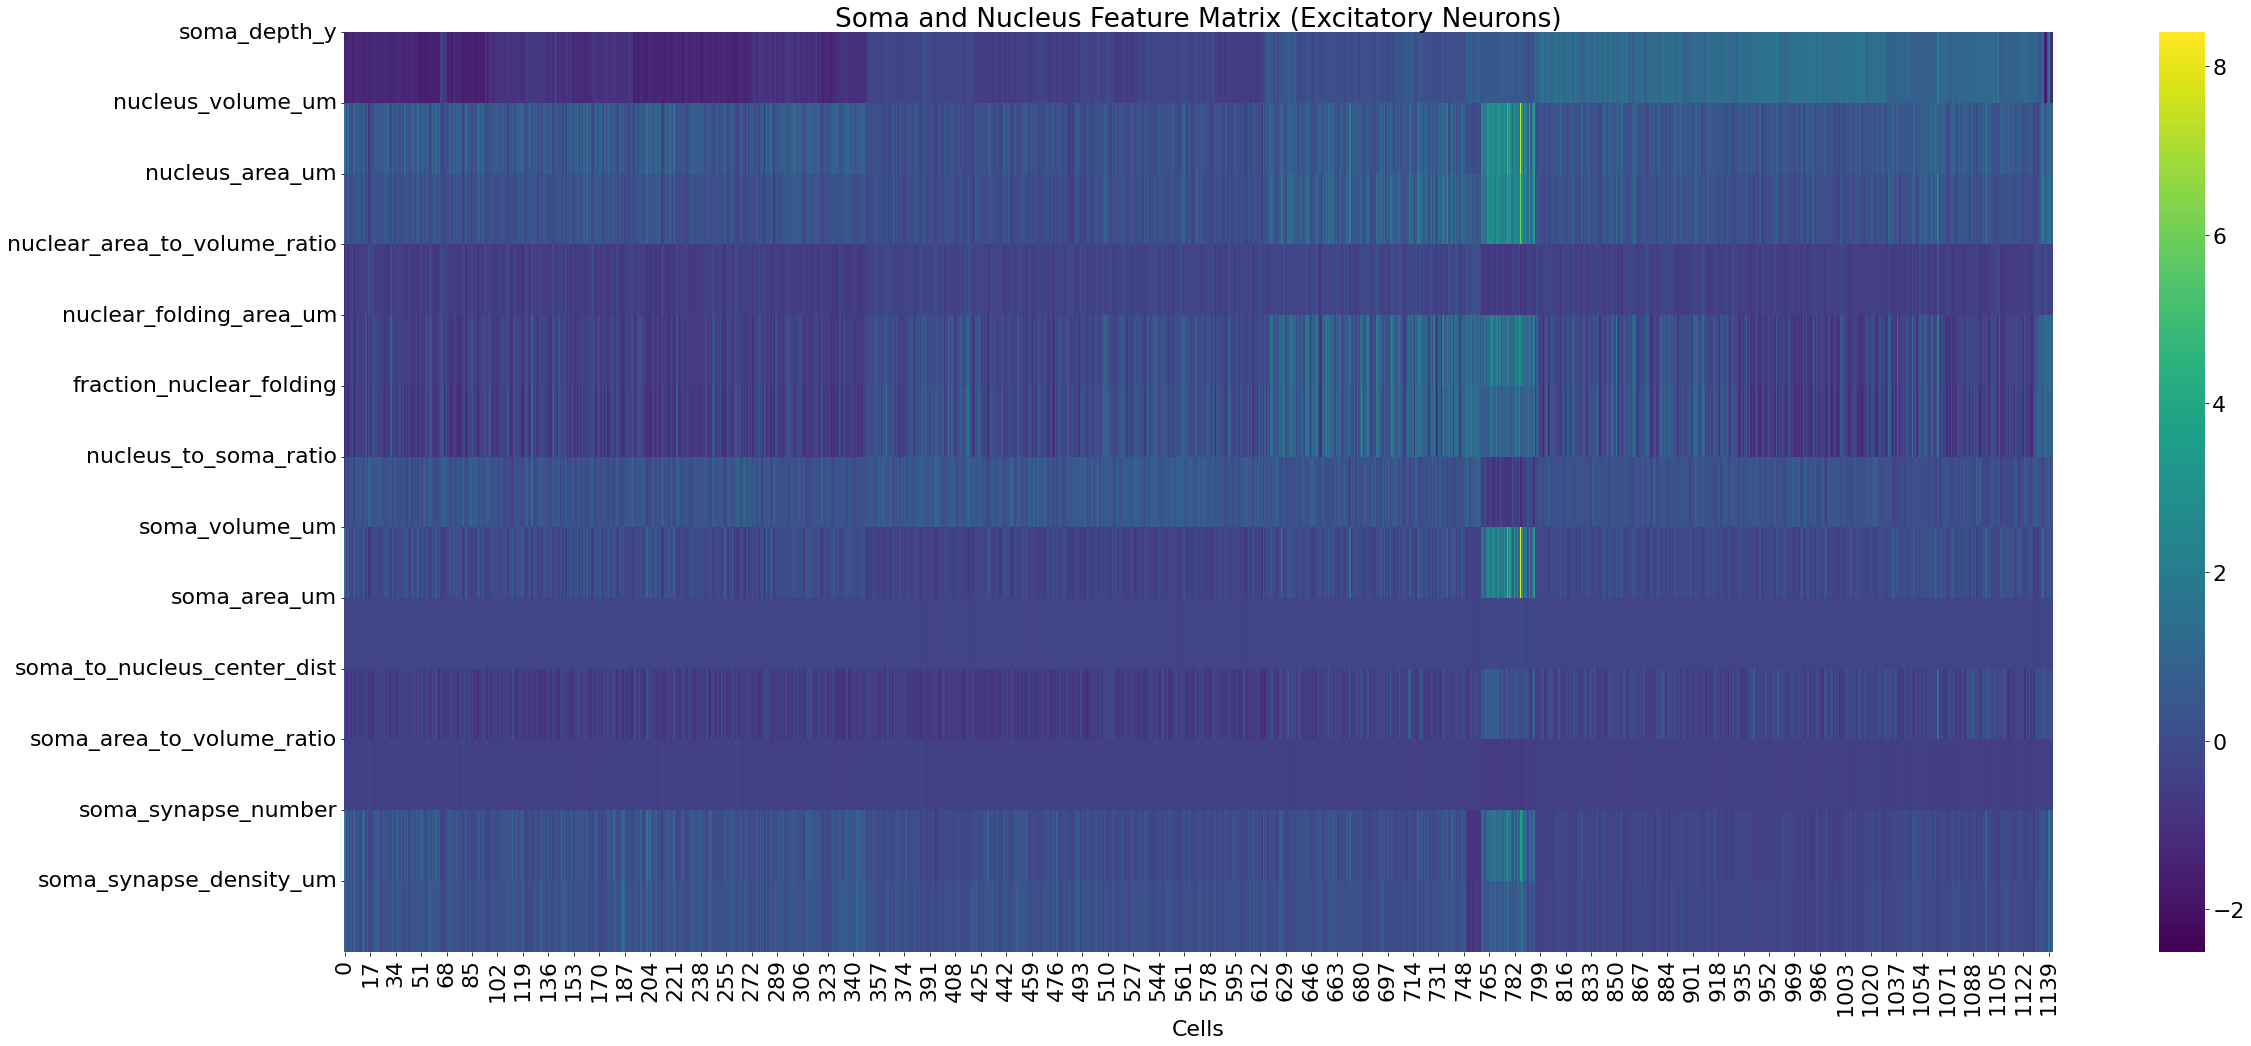

In [65]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "excitatory_neuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(35, 15))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Excitatory Neurons)")
fig.tight_layout()
plt.show()


### Inhibitory Cells

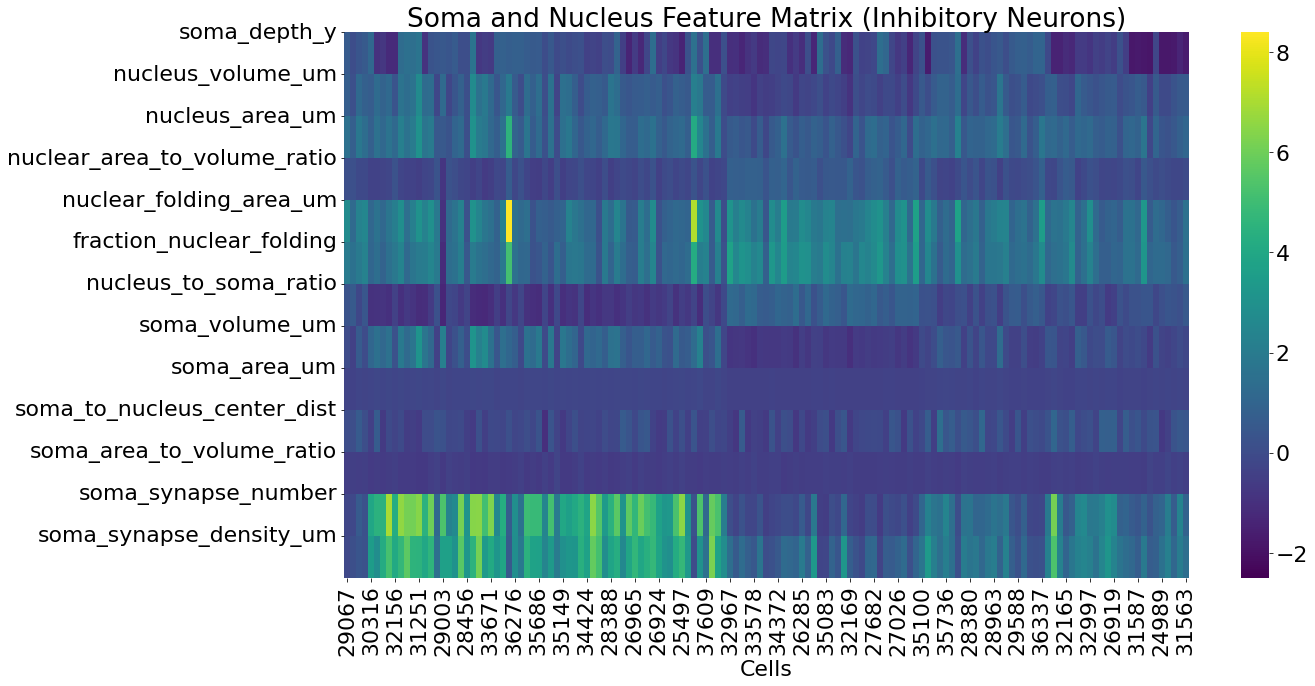

In [68]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "inhibitory_neuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(20, 10))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Inhibitory Neurons)")
fig.tight_layout()
plt.show()

### Nonneurons

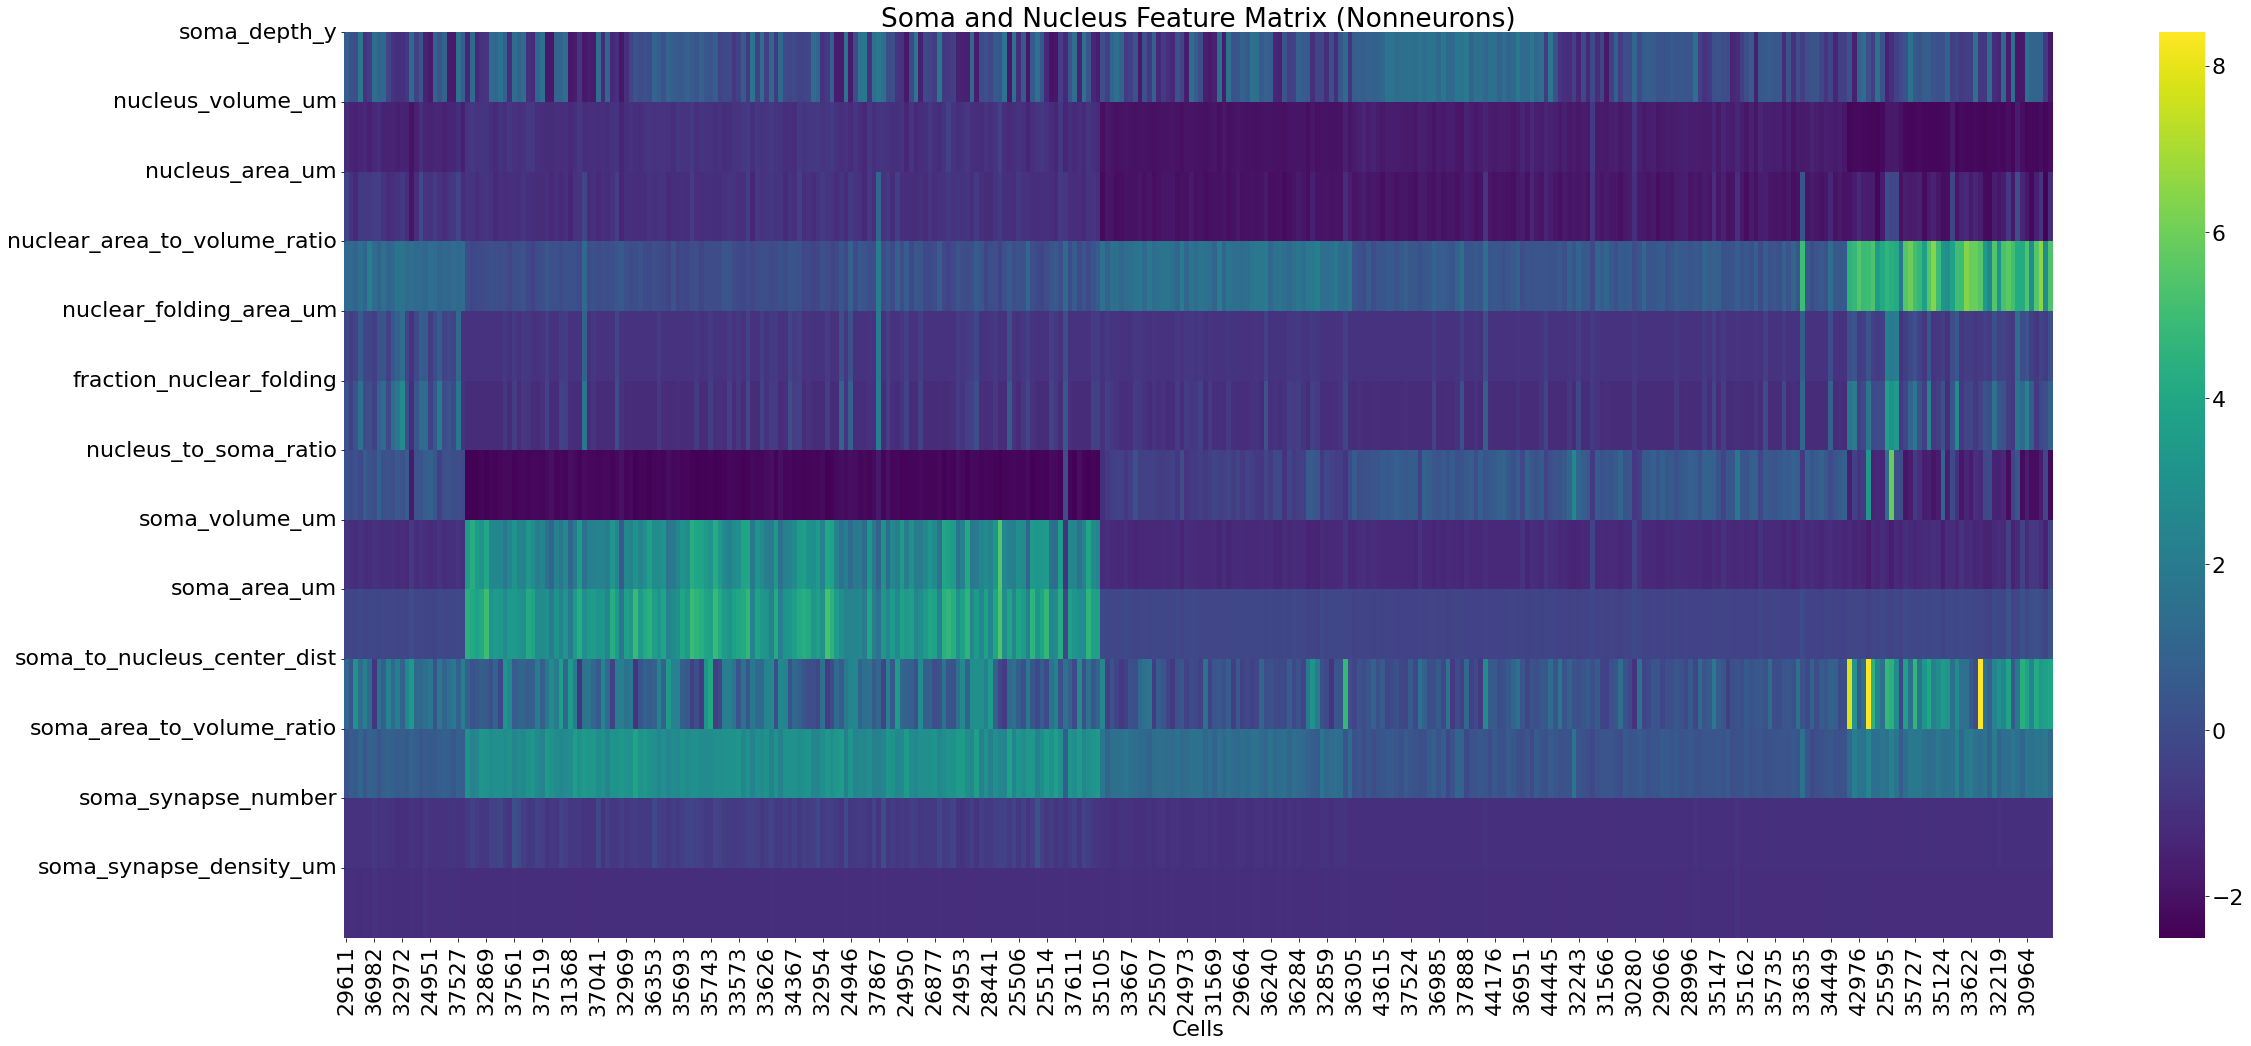

In [69]:
column_df = soma_df[~soma_df.cortical_column_labels.isna()]
subset = column_df.query('predicted_class == "nonneuron"')
sorted_df = subset.sort_values(['cortical_column_labels'])
data_column = sorted_df[metrics]

#zscoring the features by means and std of all the cells as used above
soma_features = soma_df[metrics].values
means_soma=np.mean(soma_features, axis=0)
stds_soma=np.std(soma_features, axis=0)
M_data = (data_column - means_soma)/stds_soma 

fig, ax = plt.subplots(figsize=(35, 15))
im = sns.heatmap(M_data.T, cmap='viridis', vmin=-2.5, vmax=8.4)

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics,rotation=0)
ax.set_xlabel('Cells')

ax.set_title("Soma and Nucleus Feature Matrix (Nonneurons)")
fig.tight_layout()
plt.show()

In [12]:
color_dict = {'23P':'#8268DC',
              '4P':'#647FDC',
              '5P-IT':'#77BCDE',
              '5P-ET':'#87DD90',
              '5P-NP':'#85DEC9',
              '6P-CT':'#96DD70',
              '6P-IT':'#DCC86E',
              'BC':'#D68C66',
              'BPC':'#D3697C',
              'MC':'#D36BBA',
              'NGC':'#BC6BDB',
              'astrocyte':'#009245',
              'pericyte':'#754C24',
              'microglia':'#006837',
              'oligo':'#8CC63F',
              'OPC':'#998675',
              'error':'#899499'
    
}

We can also look at the 2D UMAP at the subclass level as shown below

[Text(0.5, 0, 'UMAP 1'), Text(0, 0.5, 'UMAP 2')]

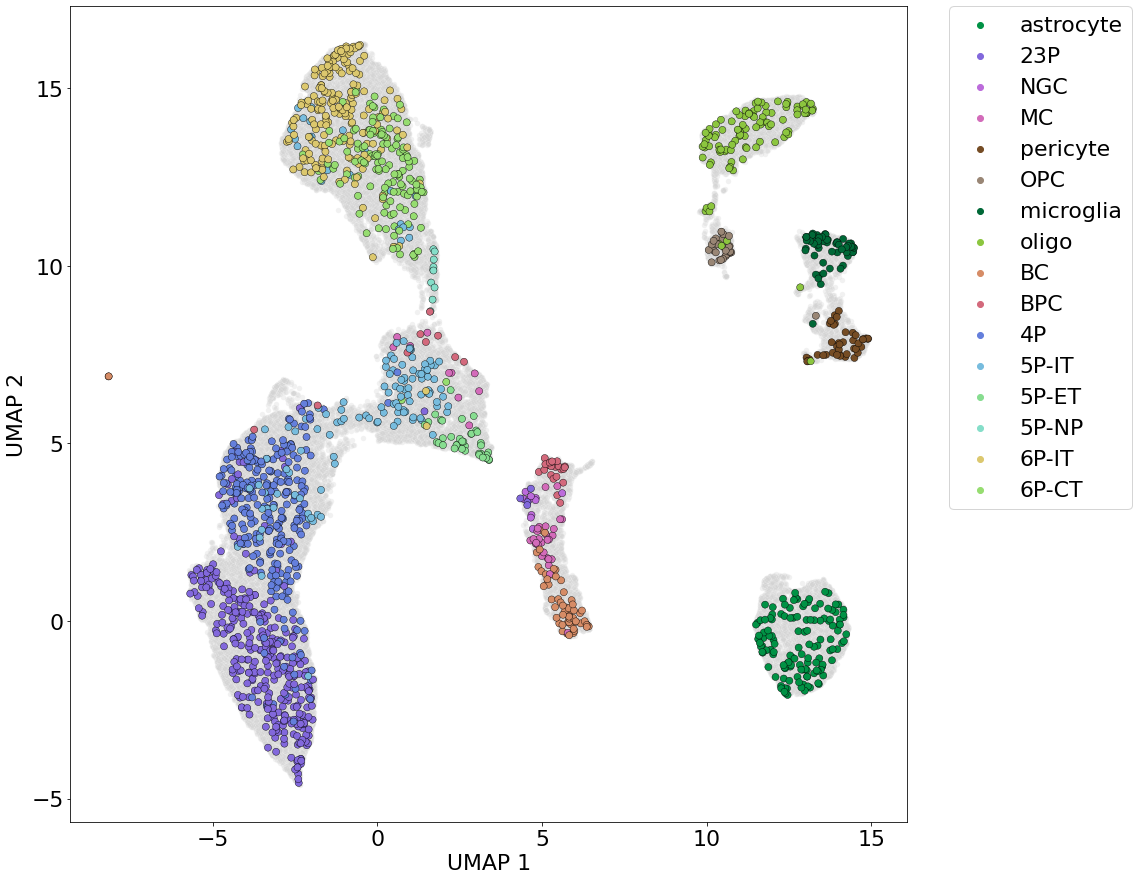

In [13]:
f,ax=plt.subplots(figsize=(15,15))

ax = sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[soma_df.cortical_column_labels.isna()],
                     s=30, ax=ax, legend=False, color='lightgray',alpha = 0.3)
sns.scatterplot(x='umap_embedding_x', y='umap_embedding_y', data=soma_df[~soma_df.cortical_column_labels.isna()],
                     s=50, ax=ax, edgecolor="black",linewidth=.4,
                    hue = 'predicted_subclass', palette = color_dict, alpha = 1.0, legend=True)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='UMAP 1', ylabel='UMAP 2')

## Cortical Column feature by feature

To explore how each invidual feature varies across the cortical column, run the code below

In [33]:
metrics = ['soma_depth_y',
 'nucleus_area_um',
 'nucleus_volume_um',
 'nuclear_area_to_volume_ratio',       
 'nuclear_folding_area_um',
 'fraction_nuclear_folding',      
 'soma_area_um',
 'soma_volume_um',
 'nucleus_to_soma_ratio',
 'soma_to_nucleus_center_dist',
 'soma_area_to_volume_ratio',
 'soma_synapse_number',
 'soma_synapse_density_um']

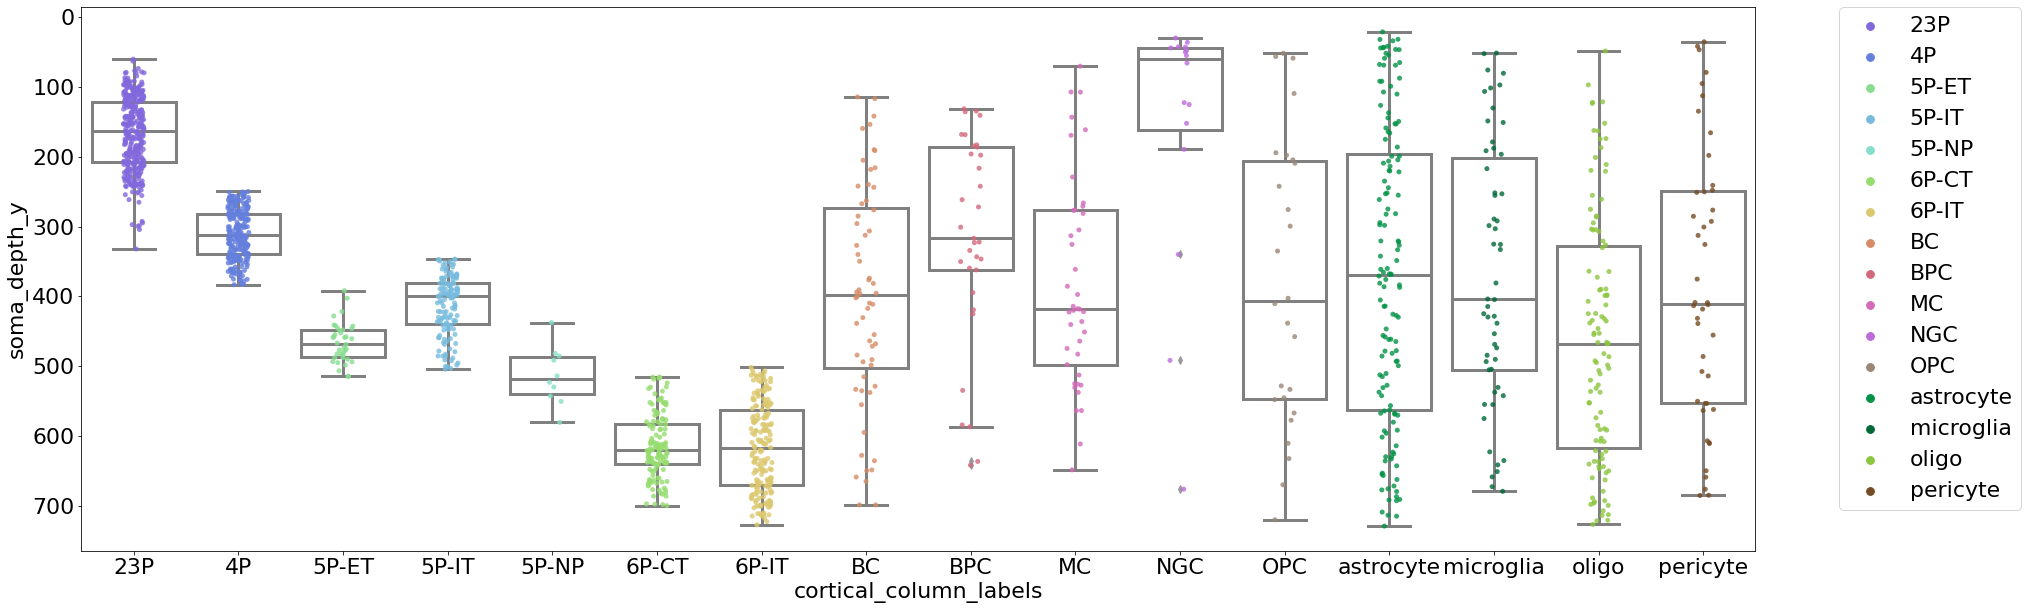

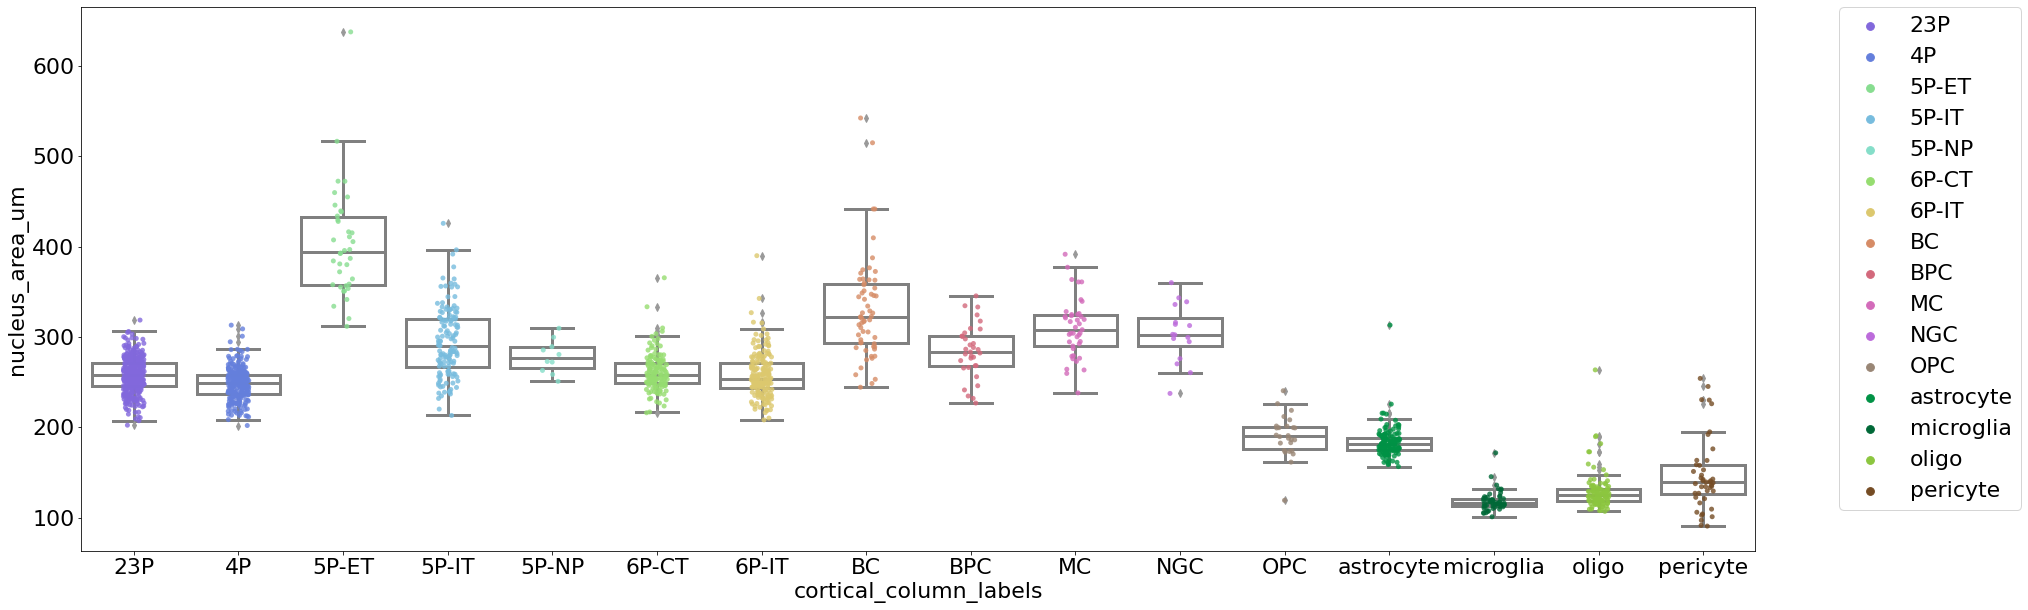

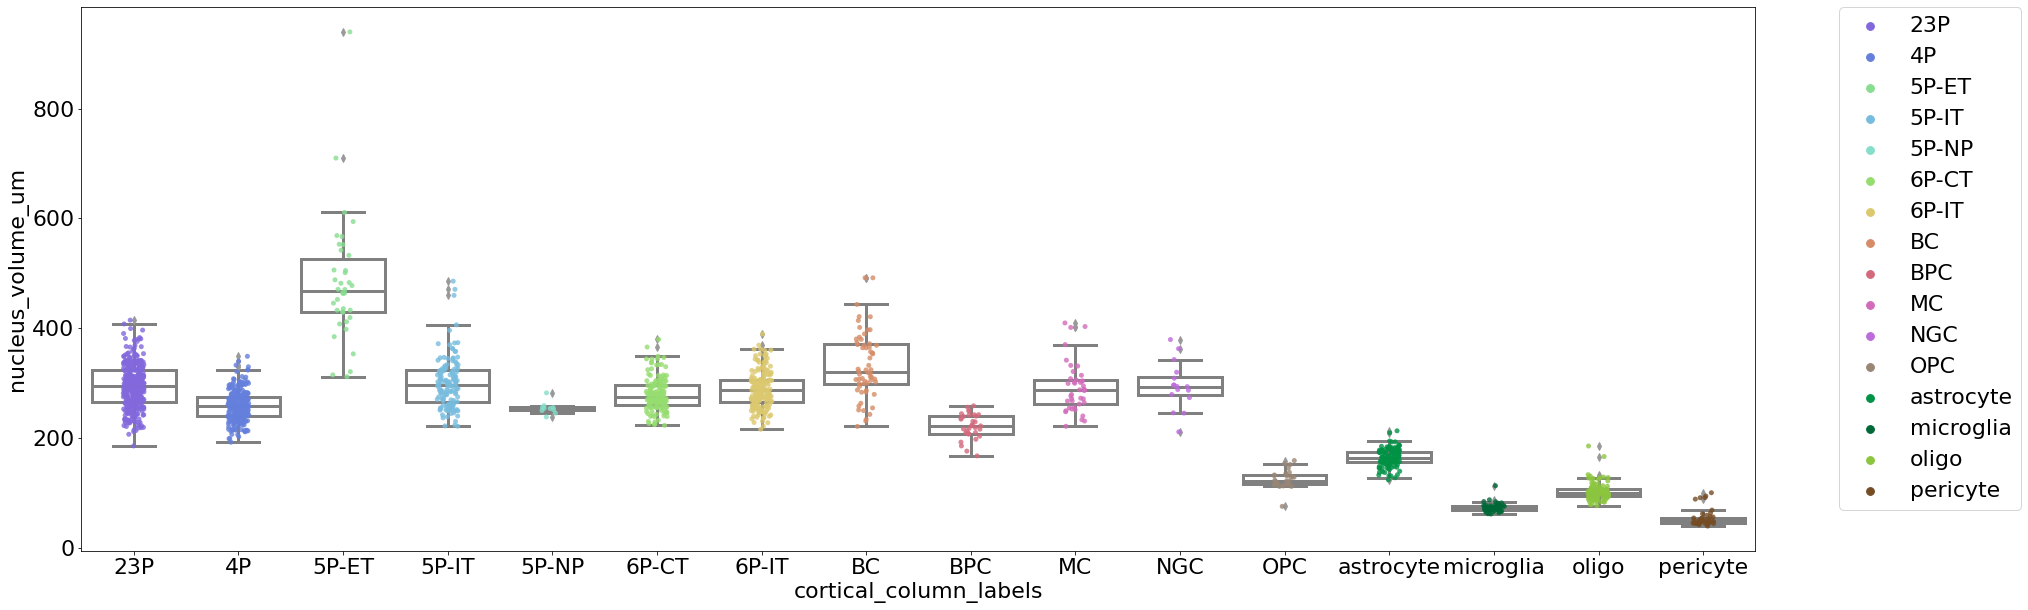

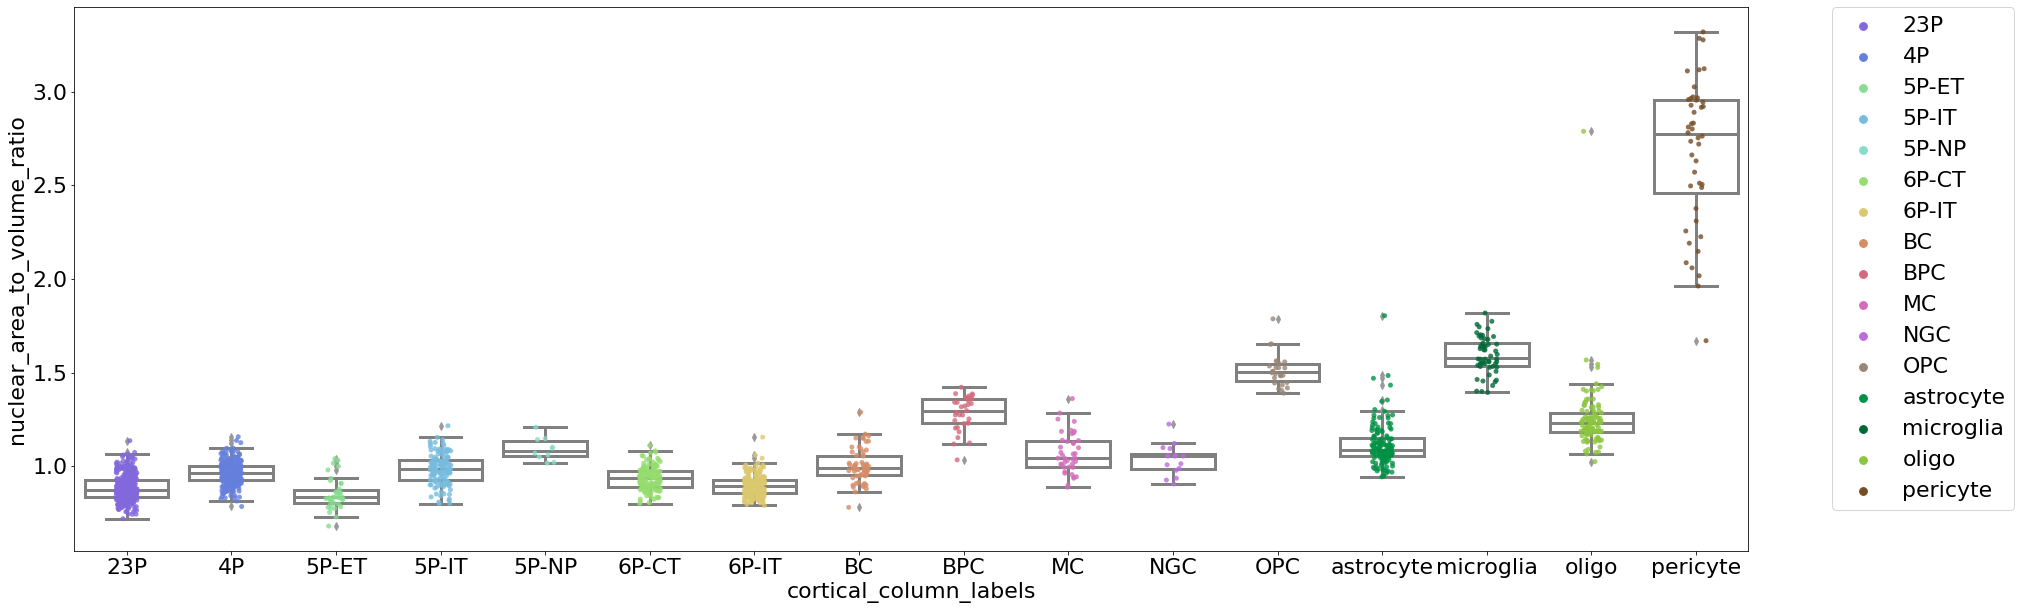

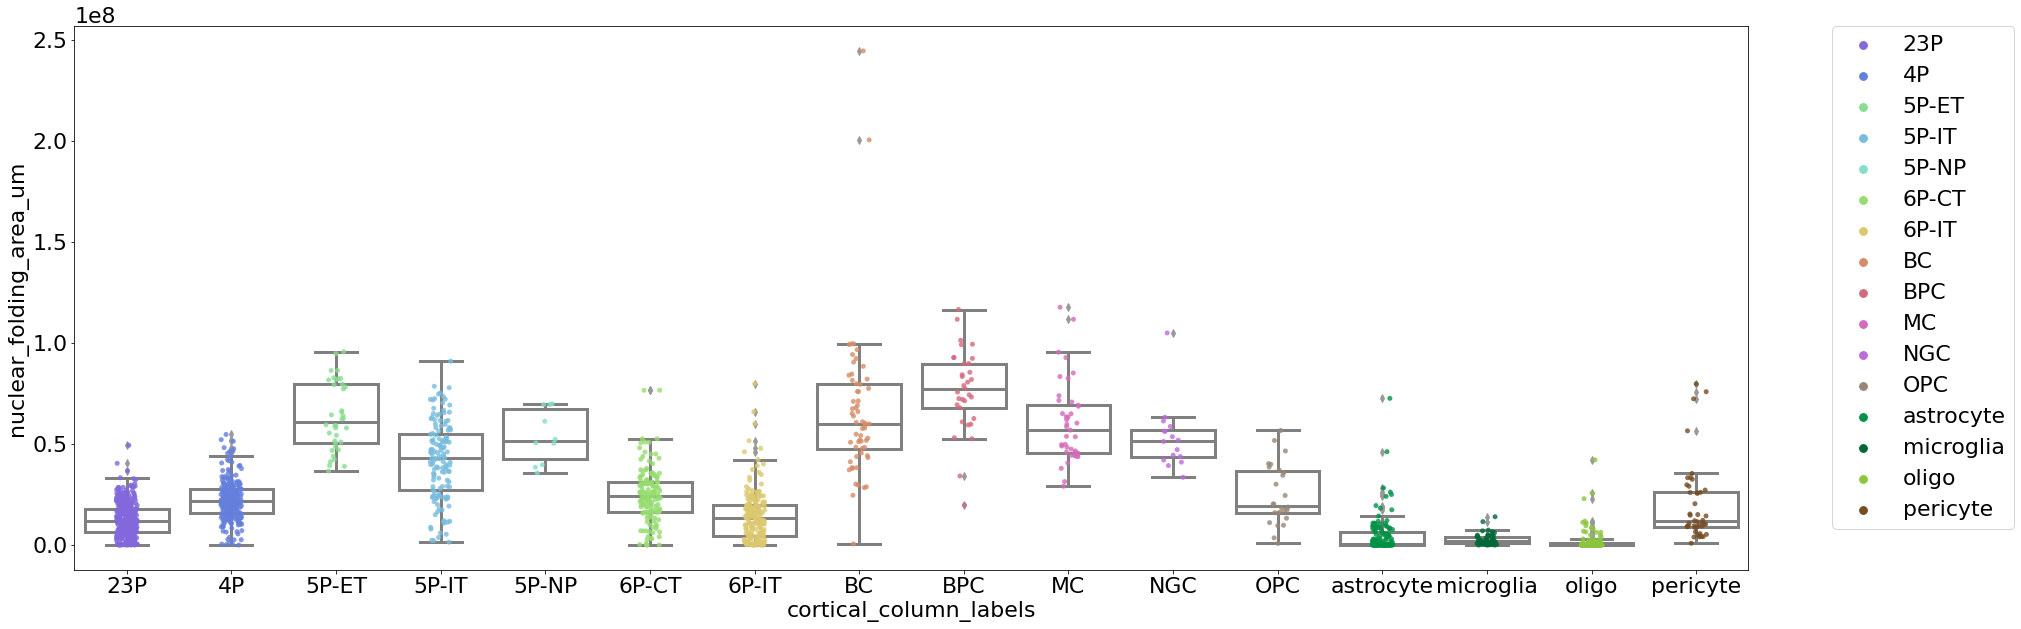

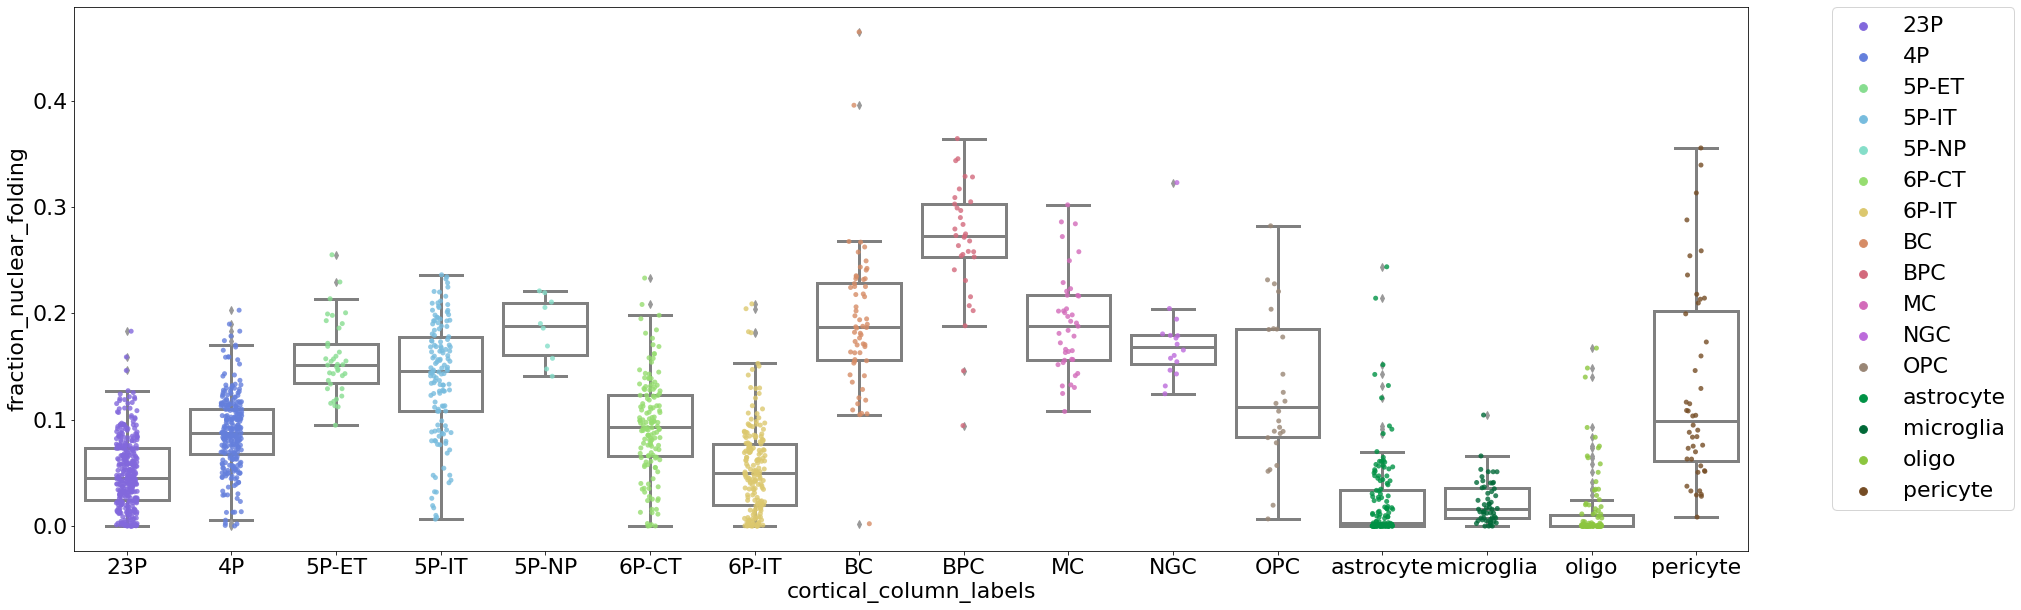

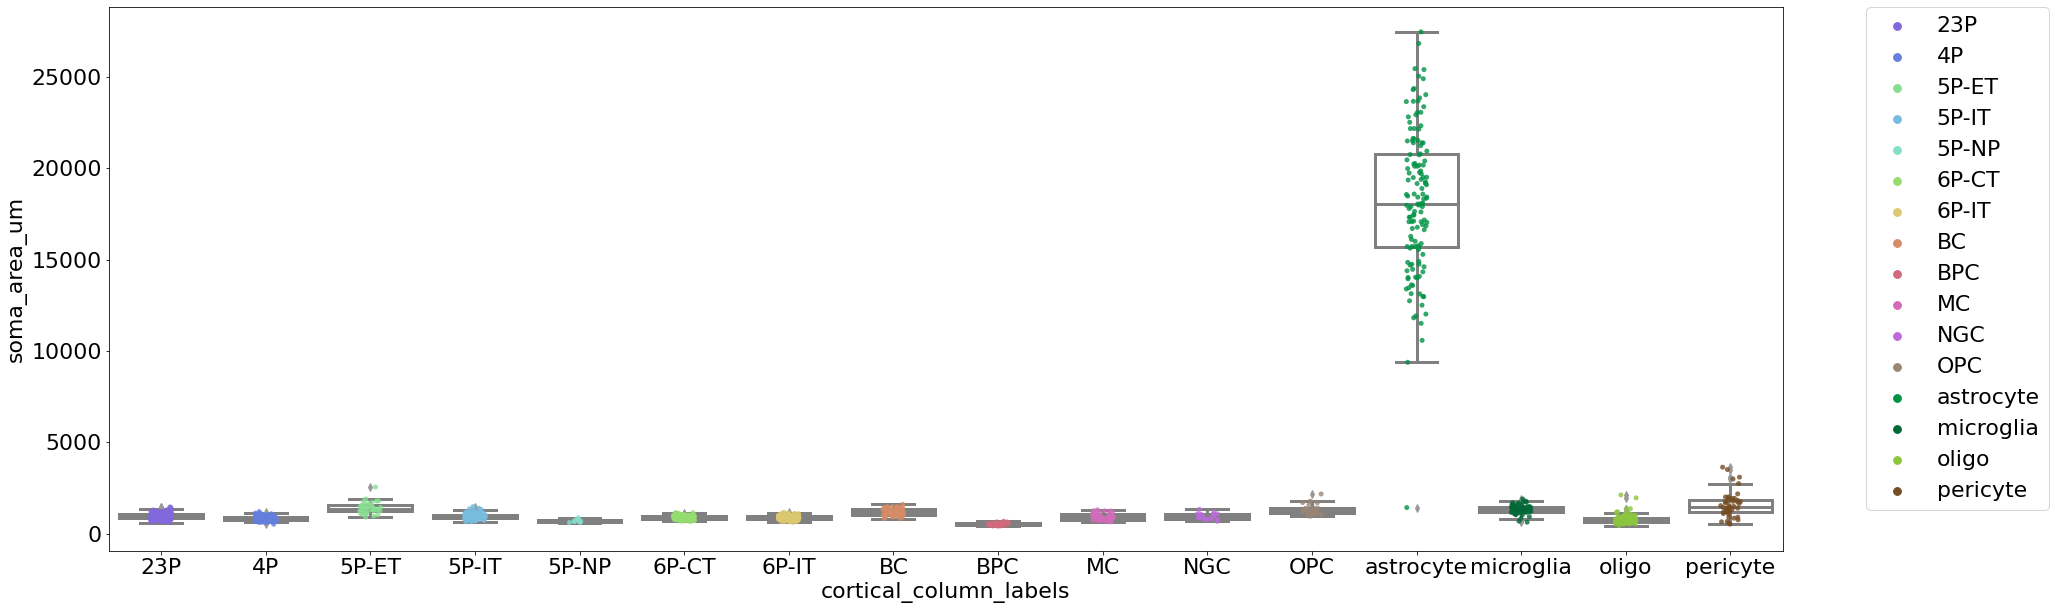

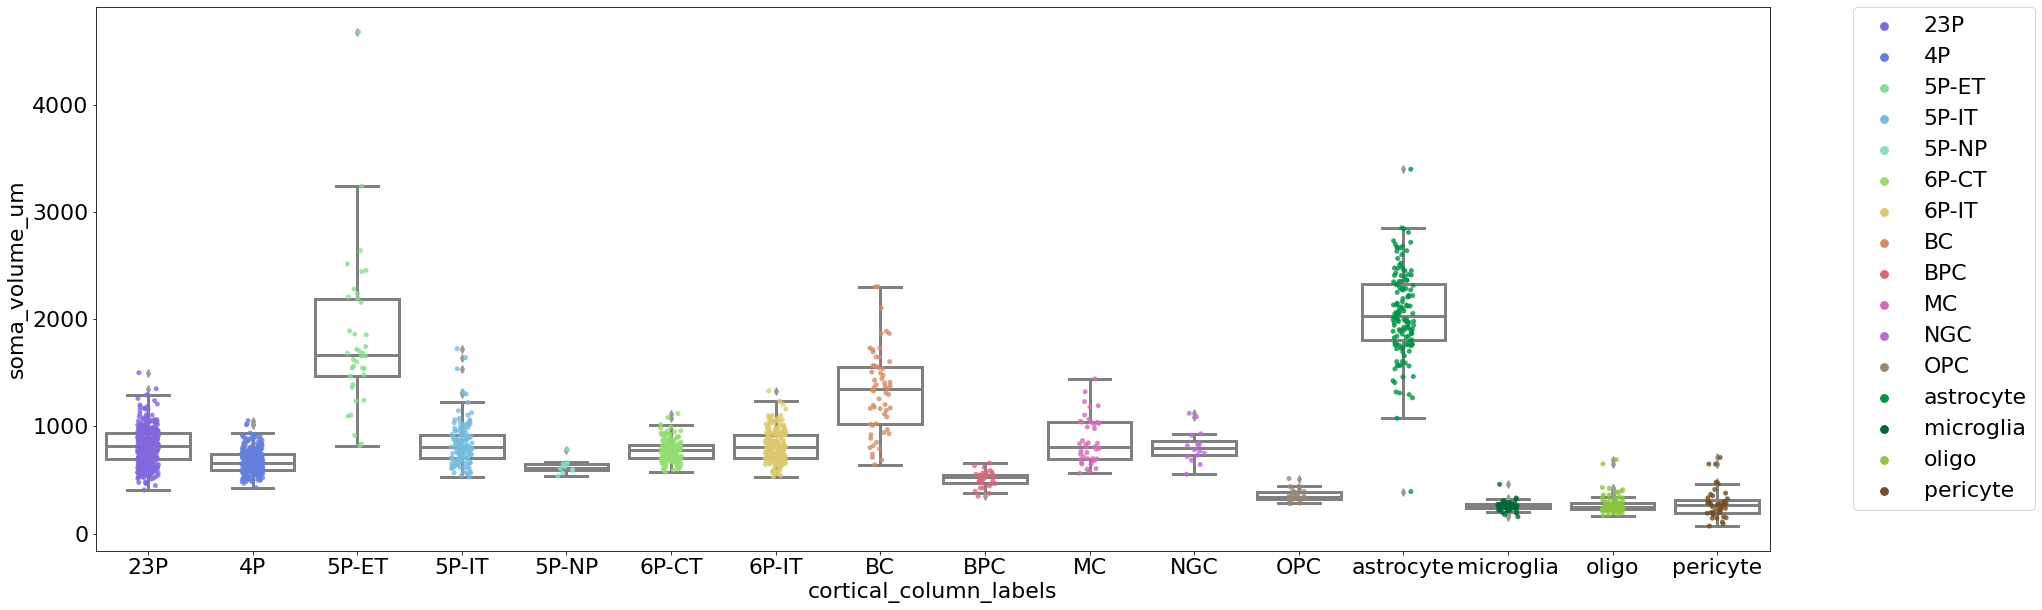

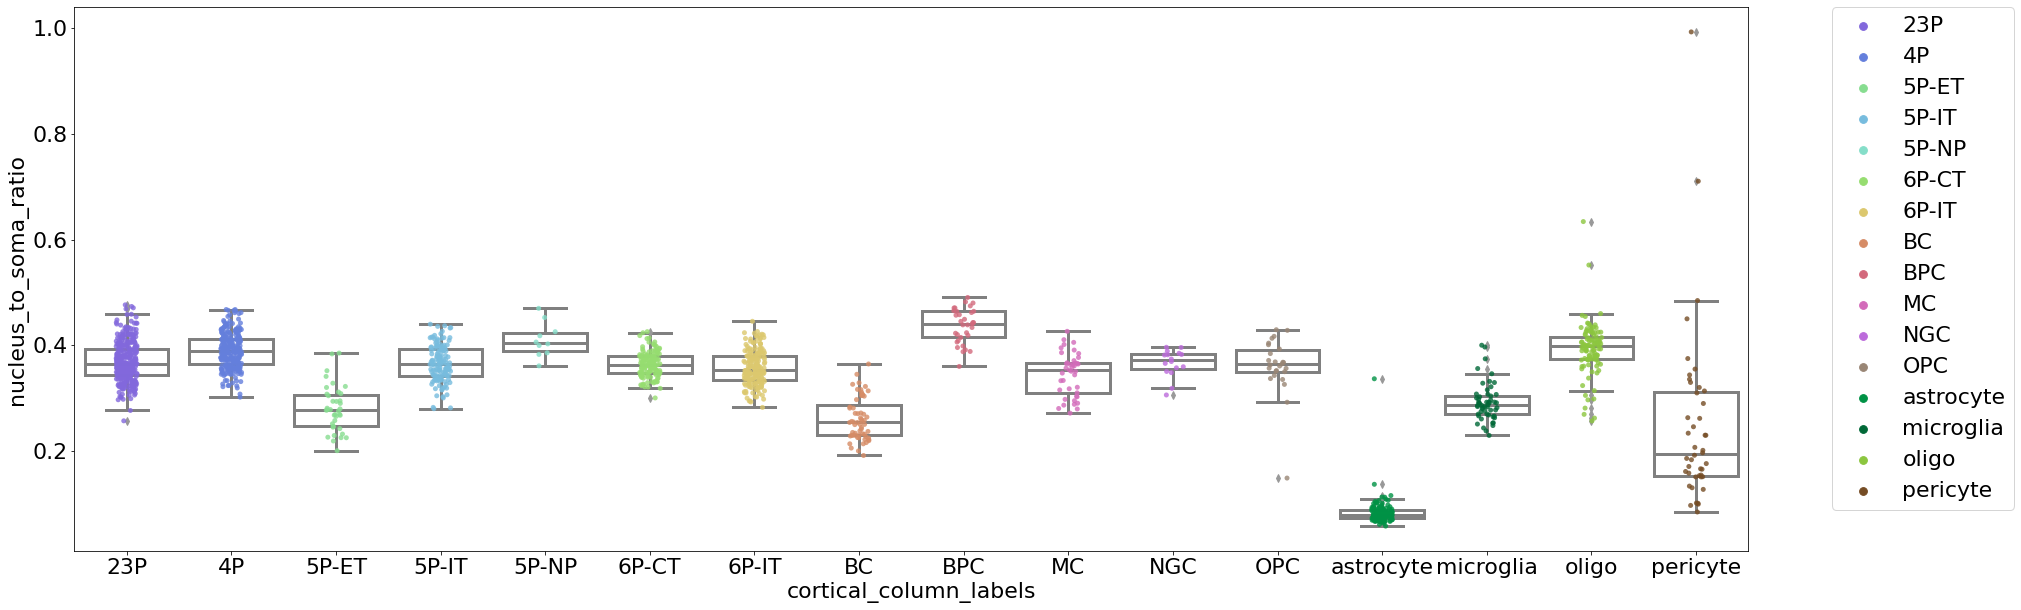

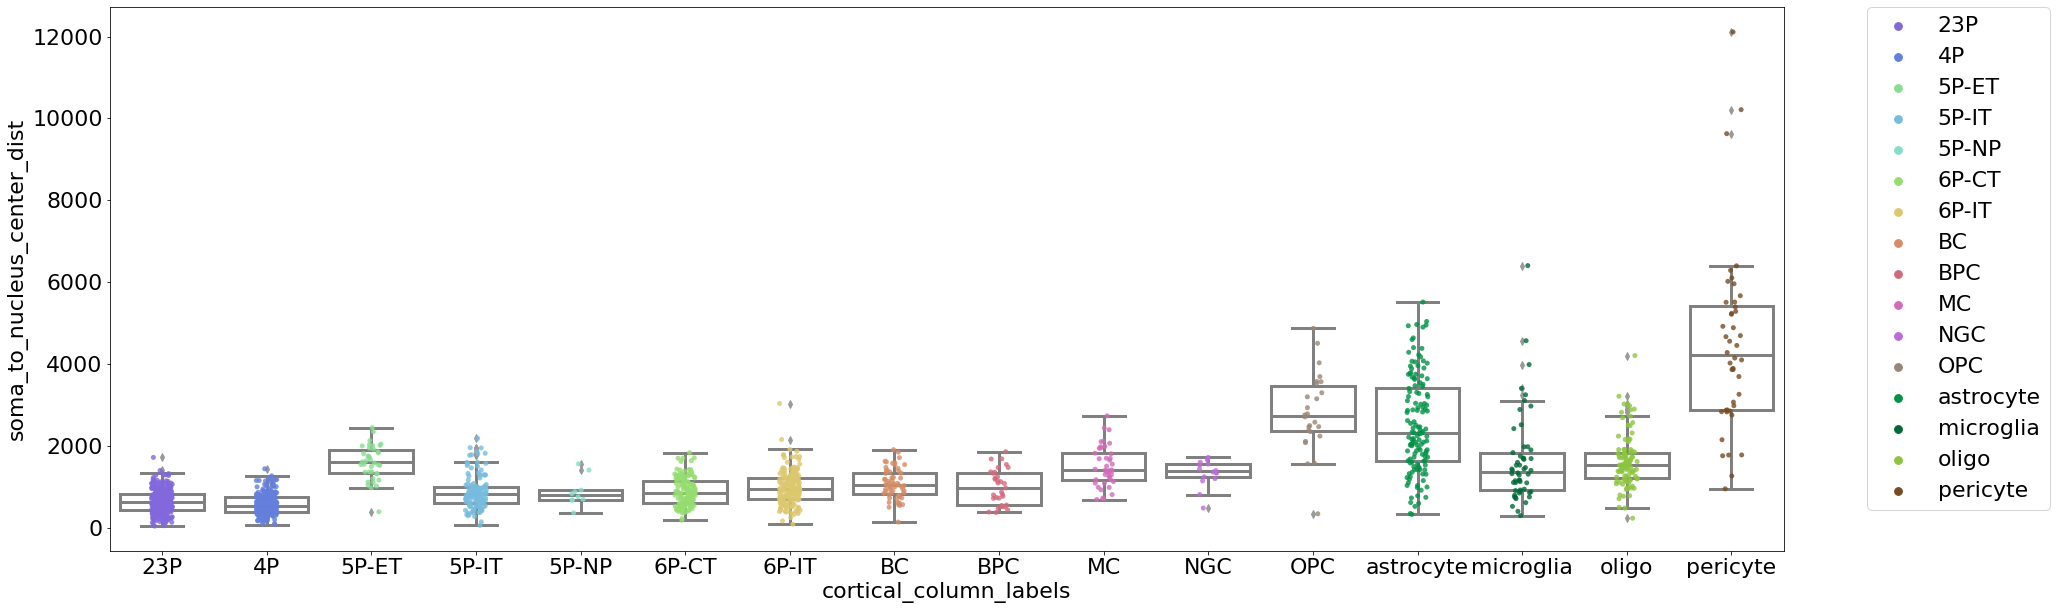

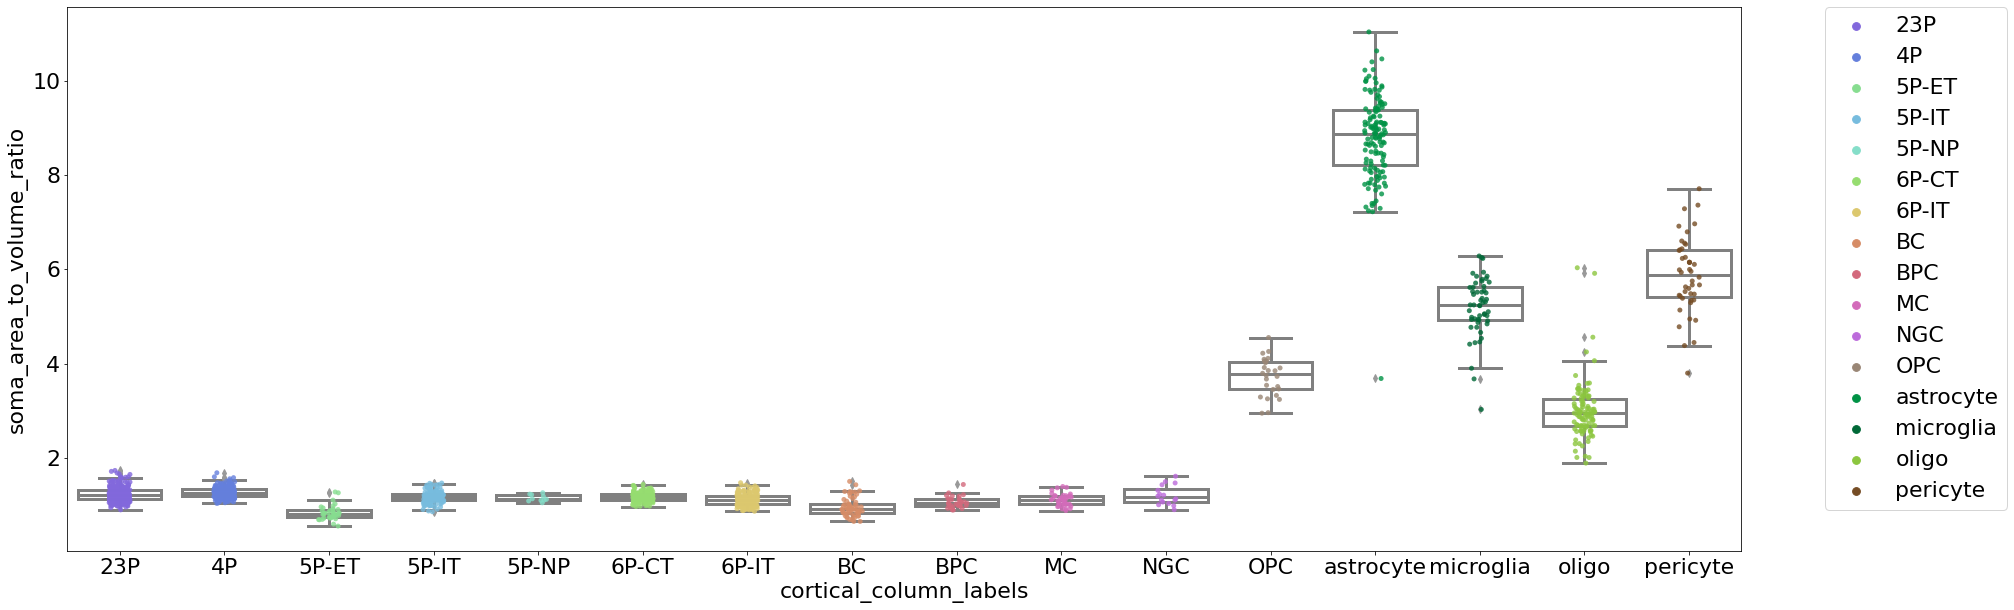

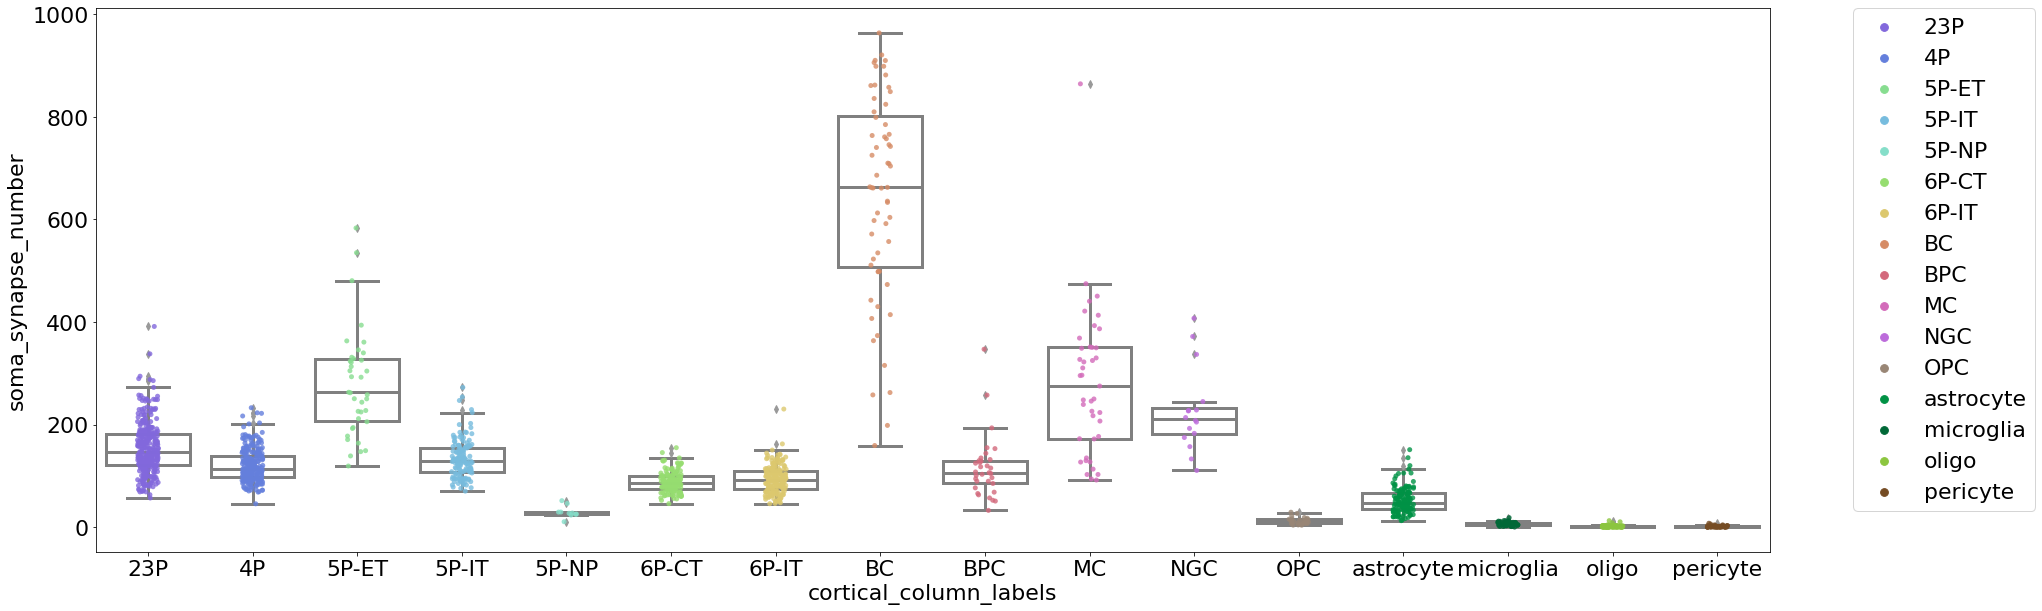

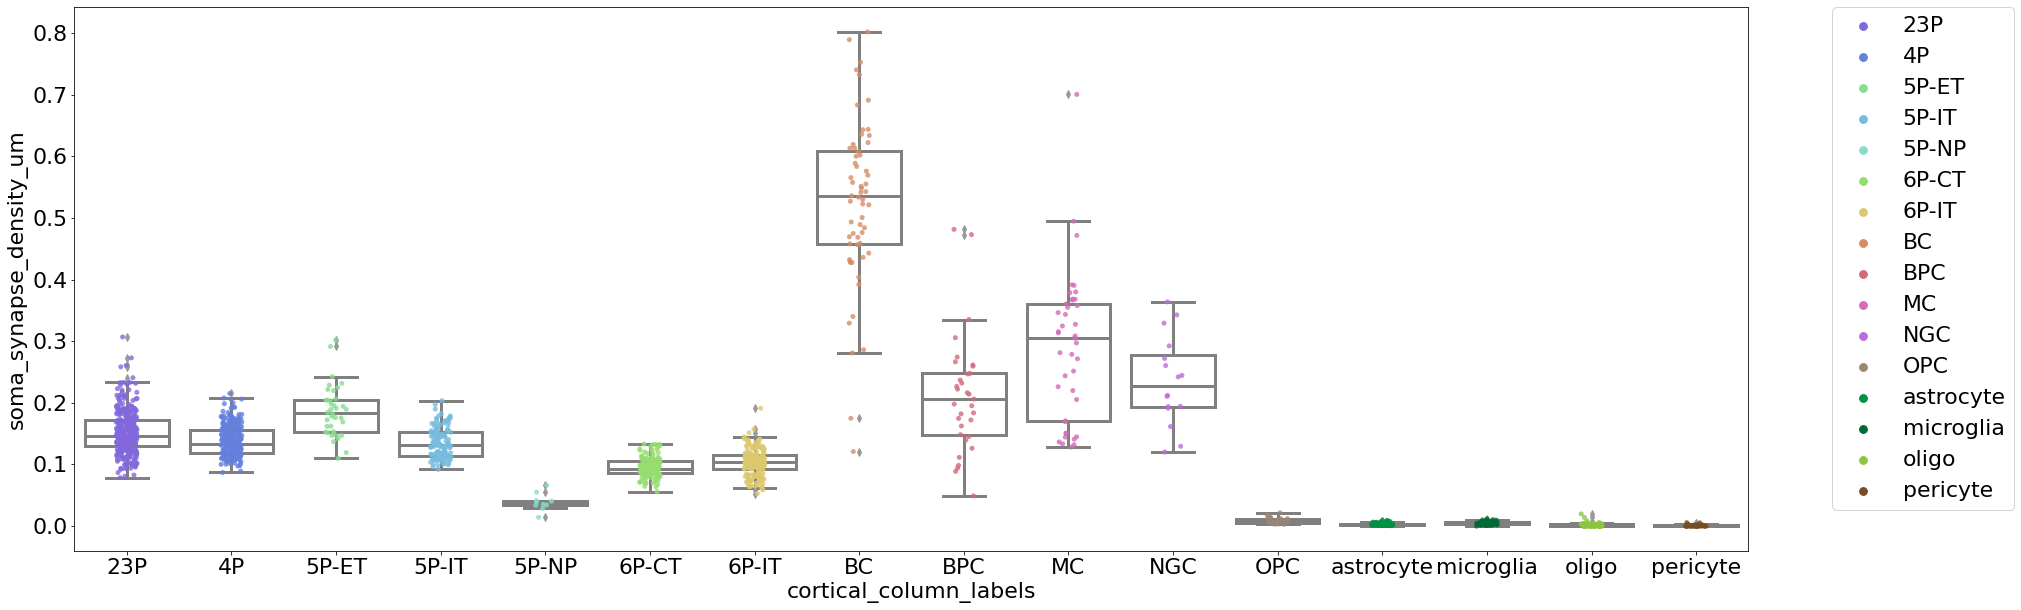

In [35]:
#Column subset of the entire dataframe
column = soma_df[~soma_df.cortical_column_labels.isna()]
for i in metrics:
    f, ax = plt.subplots(figsize=(30,10))

    #Swarmplot to see individual cells
    ax = sns.stripplot(x='cortical_column_labels', y=i,  data=column.sort_values('cortical_column_labels'), 
                  hue = 'cortical_column_labels', palette = color_dict, ax=ax, s=5, alpha=0.8)

    #Boxplot for overall distribution
    ax = sns.boxplot(x="cortical_column_labels", y=i, data=column.sort_values('cortical_column_labels'),
                    color = 'white',linewidth=3, ax=ax)
    for ix,box in enumerate(ax.artists):
        box.set_edgecolor('gray')
        box.set_facecolor('white')

        #iterate over whiskers and median lines
        for j in range(6*ix,6*(ix+1)):
             ax.lines[j].set_color('gray')

    if i == 'soma_depth_y':
        plt.gca().invert_yaxis()
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()